# 과제

In [138]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import time
import csv
import requests
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import codecs
import pytagcloud
import webbrowser

from numpy import dot
from numpy.linalg import norm
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from wordcloud import WordCloud
from matplotlib import font_manager, rc
from pprint import pprint
from konlpy.tag import Twitter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import font_manager, rc
from pandas.core.frame import DataFrame
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 크롤링

## 강철비 2 

In [2]:
urls = 'https://movie.daum.net/moviedb/grade?movieId=134698&type=netizen&page={}'

In [3]:
driver = webdriver.Chrome("chromedriver.exe")

In [4]:
review_list= []

for i in range(50):
    url = urls.format(i+1)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    lists = soup.findAll('p', {'class' : 'desc_review'})
#     print(lists)
    for review in lists:
        review_list.append(review.get_text().strip())

In [5]:
review_list

['대한민국의 현실을 직시하고 있는 영화!\r 잠수함 액션 씬은 역대 최고, 유령, 붉은 10월 보다도 멋지다!',
 '재밌다. 표값이 아깝지 않다. 강추다.',
 '',
 '재미도 있고 울림도 있었던 영화 입니다. 실 관람하고 쓰는 평이에요...',
 '굿',
 '첫부분의 패러디가 재미있었는데 주위 사람들이 웃지 않아서 어색했네요. 한국, 북한, 미국의 정상들이 너무 현실감 있게 느껴져서 지루하지가 않았어요. 시원하고 재미있게 잘 봤습니다. 어서 전쟁 상황이 끝나고 평화로운 세상이 되었으면 합니다. 배우들 모두 멋져요',
 '그냥 씨레깅 정치영화',
 '재미있게 잘 보고 왔습니다 ^^',
 '재미있게 잘 보고 왔습니다.',
 '장점: 정우성 얼굴 멋짐\r단점: 스토리, 연출, 국뽕 등등......\r 중하 수준의 한국영화임. \r오늘부터 우리는 중국국뽕 비웃으면안됨.',
 '재미있게 잘 보고 왔습니다.',
 '신선, 재미, 감동! 보람찬 두시간.',
 '크게 생각않고 봤는데 너무 재밌어서 놀랐어요, 스토리도 좋고 보는내내 긴장감 넘치고 해서 화장실도 참으면서 봤음~^^ 마지막 메시지도 좋았구요~',
 '크림슨 타이드에서 함장과 부함장사이의 갈등과 그 대단한 연기들은 이 영화에는 없었는데,\r이상하게도 영화가 끝난 다음, 북 잠수함 부함장이 기억에 남음. \r몇번 봤던 배우인데 이 영화 보고 처음 이름을 찾아봄. ^^;\rAngus MacFadyen 씨가 역할을 희화적으로 너무 잘해서\r트럼프가 보면 엄청 화낼것 같음. ㅋㅋ',
 '"조국 통일 만세"에 무너졌다는...',
 '간만에 긴박한 문제임에도 코믹하게 잘 그린 영화 즐겁게 봤습니다. \r우리 한반도의 비운도 느낄 수 있어서 가슴 한켠으로는 아프고 슬프기도 하네요. 어서 함께 할 수 있는 날이 와서 서로 오고가고 도움되는 사이가 되길 바라봅니다.',
 '지금 남북배경 상황자체가 실화라서 긴장감있게 재밋게 잘봤습니다.',
 '재밌어요 ㅎㅎ',
 '재미있어요.\r 우리나라의 위치를 지각시켜줍니다.',
 '재

In [6]:
gang2 = review_list

In [7]:
강철비2 = pd.DataFrame(gang2)

In [8]:
강철비2.to_csv('강철비2.txt', header=False, index=False)

## 강철비

In [9]:
urls2 = 'https://movie.daum.net/moviedb/grade?movieId=108880&type=netizen&page={}'

In [10]:
review_list2= []

for i in range(50):
    url = urls2.format(i+1)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    lists = soup.findAll('p', {'class' : 'desc_review'})
#     print(lists)
    for review in lists:
        review_list2.append(review.get_text().strip())

In [11]:
review_list2

['',
 '',
 '영화 아주 좋았음~\r꼭 봐야할  영화~',
 '흥미진진~!!',
 '강철비가 이렇게 재밌는 영환줄 몰랐네.',
 '액션짱 긴장감짱  \r정우성이 진지하게 웃기는게 킬포ㅋ\r지동무는 밥은 먹고 다니나?ㅋ',
 '잼난다!!!',
 '너무 잼나고  가슴 벅차고   감동적입니다 끝부분에서 박수칠뻔 가슴이 뭉클......다시 보고싶어요^"',
 '진짜 재밌게 봤어요 기대 안하고 봤는데 몰입감 쩜!!! 정우성 연기 점점 는다능~~~^^ 뚱땡이 진짜 살좀빼라 아오',
 '',
 '강철비2 잼나게 보고 들렀습니다. 참고로 강철비2는 1과는 스토리나 등장 인물 연관은 없습니다. 1보다 스케일이 커지고 잠수함 전투씬이 짜릿합니다. 매우 재밌습니다.',
 '강철비2를 기대하며 다시봐도 가슴저립니다.\r우리의 소원이 통일이전에 우리는 서로 이해하고 아픔을 안고있는 노년의 부모님들의 설움을 안아야 하지 않을까요.',
 '',
 '넷플로 이제서야 만남. \r심장이 두근두근 너무 멋진 영화. \r연출. 시나리오. 배우들의 연기 모두 너무 훌륭한 영화.',
 '감동적임',
 'ㅡ.,ㅡ',
 '지루진진 ㅋㅋ',
 '흥미진진합니다~^^',
 'ㅋㅋ',
 '주말에 재미나게 봤네요.\r이전에 영화관에서 보고 재미있었는데, 다시봐도 재미있네요!\r 정말 우리나라가 핵을 보유할 수 있는 방법은 이방법 괜찮은거 같은데요?\r 강철비2가 나온다고 해서 다시 봤는데, 강철비2는 속편의 개념이 아닌거 같아서 조금 아쉬웠어요 ㅠ',
 '아 ~ ;;;     아무리 그래도 그러치\r 이러케까지 해야하나',
 '강철비2를 보려고 강철비1을 찾아보았는데\r생각외로 재밌었음 긴러닝타임이지만 지루하지않고\r스토리구성도 탄탄하고 제작비를  엄청 썼을거같은 스케일이 남달랐다 다만 정우성의 북한말이 잘안들려서 몰입도가\r중간중간 끊기는게아쉽다  곽도원의 연기는 역시 최고다',
 '',
 '우리국민들 수백만명을 학살하고도 사과 한마디도 안하고오히려 핵미사일로 협박해서 돈 뜯어내고 연방제통일하려는 북한

In [12]:
gang = review_list2

In [13]:
강철비 = pd.DataFrame(gang)

In [14]:
강철비.to_csv('강철비.txt', header=False, index=False)

## 변호인

In [15]:
urls3 = 'https://movie.daum.net/moviedb/grade?movieId=76325&type=netizen&page={}'

In [16]:
review_list3= []

for i in range(50):
    url = urls3.format(i+1)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    lists = soup.findAll('p', {'class' : 'desc_review'})
#     print(lists)
    for review in lists:
        review_list3.append(review.get_text().strip())

In [17]:
review_list3

['',
 '아래 글에 독재 시절 때 물고문 처 당하다가 뒤지거나 사료기에 갈려 죽거나 하는거 좋아하는 놈들 많네.\r그 시절이라면 일베, 태극기부대들이 살아있었을까?',
 '노무현이의 성장통영화.그를 싫어하지만 싸워야하는 시대였다.반골이고 어차피 비주류.노무현 그의 변호사시절에게 박수친다',
 '그립다..고마운 영화',
 'ㅡㅡ',
 '송강호 이성민 오달수 곽도원 정원중 임시완 배우님 그리고 이젠 하늘의 별이 되신 고 김영애 배우님까지 라인업만 봐도 후덜덜한데 아픈 역사와 재판까지 어느 장면을 보더라도 고증도 잘되어 있고 스토리라인도 기승전결이 완벽해서 정말 인생 영화라 칭해도 될 영화 내가 만약 죽기 전에 한 편의 영화를 볼 수 있다면 단언컨데 변호인을 볼 것이다',
 '더러운세상에 묻어가지말자 소신을지키자',
 '몇번을 봐도 눈물이 흐릅니다\r노대통령님,  당신의 길지  않은 삶은 \r이회영  독립운동가가 20대에 하셨던 말씀\rㅡ한 번 뿐인 삶을 어떻게 살아야할까ㅡ\r에 답을 주신 삶이었습니다\r 당신이 얼마나 훌륭한 분이었는지\r늘 가슴속에 새기며 살아가고 있습니다\r 당신이 없는 여전히 악의 무리가 가진자들이\r되어 권력을 행사하는 이 나라가 너무나 걱정되고 그런 무리들에 맞서 국민만 보며 몸상하시는 거 상관치 않고 가는 문대통령님께 너무나 죄송하지만 그래도 전 행복합니다\r두대통령님이 대통령인 나라에 살고 있으니까요\r 노대통령님 \r너무나 뵙고 싶습니다\r 영화속 당신이 아닌 진짜 당신을 ㅠㅠ',
 '가슴 벅찬 이야기',
 '가슴아프네요',
 '그립고 그리운 우리의  영원한 대통령님~',
 '오늘 노무현대통령 서거 11주기 추도식. 지금 영화채널Screen에서 해주네요.. 다시 봅니다.. 아.. 80년대 전두환 정권,검.경.법이 국민들에게 저지른 짓에 눈물이 나네요',
 'ㆍ',
 '사람사는 세상!\r사람이 먼저다!\r깊은 울림이 있는 영화!\r아들들과 같이 봤네요.\r그립습니다.\r그분.',
 '',
 '영화2,3번 봐도 질리지않고 너무조타 이

In [32]:
byun = review_list3

In [33]:
변호인 = pd.DataFrame(byun)

In [34]:
변호인.to_csv('변호인.txt', header=False, index=False)

# 분석

### 기본 작업 - 불용어 사전 정의

In [18]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

In [19]:
mv_stop_words ='''아
휴
아이구
아이쿠
아이고
어
나
우리
저희
따라
의해
을
를
에
의
가
으로
로
에게
뿐이다
의거하여
근거하여
입각하여
기준으로
예하면
예를 들면
예를 들자면
저
소인
소생
저희
지말고
하지마
하지마라
다른
물론
또한
그리고
비길수 없다
해서는 안된다
뿐만 아니라
만이 아니다
만은 아니다
막론하고
관계없이
그치지 않다
그러나
그런데
하지만
든간에
논하지 않다
따지지 않다
설사
비록
더라도
아니면
만 못하다
하는 편이 낫다
불문하고
향하여
향해서
향하다
쪽으로
틈타
이용하여
타다
오르다
제외하고
이 외에
이 밖에
하여야
비로소
한다면 몰라도
외에도
이곳
여기
부터
기점으로
따라서
할 생각이다
하려고하다
이리하여
그리하여
그렇게 함으로써
하지만
일때
할때
앞에서
중에서
보는데서
으로써
로써
까지
해야한다
일것이다
반드시
할줄알다
할수있다
할수있어
임에 틀림없다
한다면
등
등등
제
겨우
단지
다만
할뿐
딩동
댕그
대해서
대하여
대하면
훨씬
얼마나
얼마만큼
얼마큼
남짓
여
얼마간
약간
다소
좀
조금
다수
몇
얼마
지만
하물며
또한
그러나
그렇지만
하지만
이외에도
대해 말하자면
뿐이다
다음에
반대로
반대로 말하자면
이와 반대로
바꾸어서 말하면
바꾸어서 한다면
만약
그렇지않으면
까악
툭
딱
삐걱거리다
보드득
비걱거리다
꽈당
응당
해야한다
에 가서
각
각각
여러분
각종
각자
제각기
하도록하다
와
과
그러므로
그래서
고로
한 까닭에
하기 때문에
거니와
이지만
대하여
관하여
관한
과연
실로
아니나다를가
생각한대로
진짜로
한적이있다
하곤하였다
하
하하
허허
아하
거바
와
오
왜
어째서
무엇때문에
어찌
하겠는가
무슨
어디
어느곳
더군다나
하물며
더욱이는
어느때
언제
야
이봐
어이
여보시오
흐흐
흥
휴
헉헉
헐떡헐떡
영차
여차
어기여차
끙끙
아야
앗
아야
콸콸
졸졸
좍좍
뚝뚝
주룩주룩
솨
우르르
그래도
또
그리고
바꾸어말하면
바꾸어말하자면
혹은
혹시
답다
및
그에 따르는
때가 되어
즉
지든지
설령
가령
하더라도
할지라도
일지라도
지든지
몇
거의
하마터면
인젠
이젠
된바에야
된이상
만큼	어찌됏든
그위에
게다가
점에서 보아
비추어 보아
고려하면
하게될것이다
일것이다
비교적
좀
보다더
비하면
시키다
하게하다
할만하다
의해서
연이서
이어서
잇따라
뒤따라
뒤이어
결국
의지하여
기대여
통하여
자마자
더욱더
불구하고
얼마든지
마음대로
주저하지 않고
곧
즉시
바로
당장
하자마자
밖에 안된다
하면된다
그래
그렇지
요컨대
다시 말하자면
바꿔 말하면
즉
구체적으로
말하자면
시작하여
시초에
이상
허
헉
허걱
바와같이
해도좋다
해도된다
게다가
더구나
하물며
와르르
팍
퍽
펄렁
동안
이래
하고있었다
이었다
에서
로부터
까지
예하면
했어요
해요
함께
같이
더불어
마저
마저도
양자
모두
습니다
가까스로
하려고하다
즈음하여
다른
다른 방면으로
해봐요
습니까
했어요
말할것도 없고
무릎쓰고
개의치않고
하는것만 못하다
하는것이 낫다
매
매번
들
모
어느것
어느
로써
갖고말하자면
어디
어느쪽
어느것
어느해
어느 년도
라 해도
언젠가
어떤것
어느것
저기
저쪽
저것
그때
그럼
그러면
요만한걸
그래
그때
저것만큼
그저
이르기까지
할 줄 안다
할 힘이 있다
너
너희
당신
어찌
설마
차라리
할지언정
할지라도
할망정
할지언정
구토하다
게우다
토하다
메쓰겁다
옆사람
퉤
쳇
의거하여
근거하여
의해
따라
힘입어
그
다음
버금
두번째로
기타
첫번째로
나머지는
그중에서
견지에서
형식으로 쓰여
입장에서
위해서
단지
의해되다
하도록시키다
뿐만아니라
반대로
전후
전자
앞의것
잠시
잠깐
하면서
그렇지만
다음에
그러한즉
그런즉
남들
아무거나
어찌하든지
같다
비슷하다
예컨대
이럴정도로
어떻게
만약
만일
위에서 서술한바와같이
인 듯하다
하지 않는다면
만약에
무엇
무슨
어느
어떤
아래윗
조차
한데
그럼에도 불구하고
여전히
심지어
까지도
조차도
하지 않도록
않기 위하여
때
시각
무렵
시간
동안
어때
어떠한
하여금
네
예
우선
누구
누가 알겠는가
아무도
줄은모른다
줄은 몰랏다
하는 김에
겸사겸사
하는바
그런 까닭에
한 이유는
그러니
그러니까
때문에
그
너희
그들
너희들
타인
것
것들
너
위하여
공동으로
동시에
하기 위하여
어찌하여
무엇때문에
붕붕
윙윙
나
우리
엉엉
휘익
윙윙
오호
아하
어쨋든
만 못하다	하기보다는
차라리
하는 편이 낫다
흐흐
놀라다
상대적으로 말하자면
마치
아니라면
쉿
그렇지 않으면
그렇지 않다면
안 그러면
아니었다면
하든지
아니면
이라면
좋아
알았어
하는것도
그만이다
어쩔수 없다
하나
일
일반적으로
일단
한켠으로는
오자마자
이렇게되면
이와같다면
전부
한마디
한항목
근거로
하기에
아울러
하지 않도록
않기 위해서
이르기까지
이 되다
로 인하여
까닭으로
이유만으로
이로 인하여
그래서
이 때문에
그러므로
그런 까닭에
알 수 있다
결론을 낼 수 있다
으로 인하여
있다
어떤것
관계가 있다
관련이 있다
연관되다
어떤것들
에 대해
이리하여
그리하여
여부
하기보다는
하느니
하면 할수록
운운
이러이러하다
하구나
하도다
다시말하면
다음으로
에 있다
에 달려 있다
우리
우리들
오히려
하기는한데
어떻게
어떻해
어찌됏어
어때
어째서
본대로
자
이
이쪽
여기
이것
이번
이렇게말하자면
이런
이러한
이와 같은
요만큼
요만한 것
얼마 안 되는 것
이만큼
이 정도의
이렇게 많은 것
이와 같다
이때
이렇구나
것과 같이
끼익
삐걱
따위
와 같은 사람들
부류의 사람들
왜냐하면
중의하나
오직
오로지
에 한하다
하기만 하면
도착하다
까지 미치다
도달하다
정도에 이르다
할 지경이다
결과에 이르다
관해서는
여러분
하고 있다
한 후
혼자
자기
자기집
자신
우에 종합한것과같이
총적으로 보면
총적으로 말하면
총적으로
대로 하다
으로서
참
그만이다
할 따름이다
쿵
탕탕
쾅쾅
둥둥
봐
봐라
아이야
아니
와아
응
아이
참나
년
월
일
령
영
일
이
삼
사
오
육
륙
칠
팔
구
이천육
이천칠
이천팔
이천구
하나
둘
셋
넷
다섯
여섯
일곱
여덟
아홉
령
""
''
.
,
영'''
mv_stop_words = mv_stop_words.split('\n')
mv_stop_words[0:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

## 워드 클라우드

### 강철비2

In [20]:
mv_nouns = []
for post in gang2:
    for noun in tagger.nouns(post):
        if noun not in mv_stop_words:
            mv_nouns.append(noun)

mv_nouns[0:10]

['대한민국', '현실', '직시', '영화', '잠수함', '액션', '씬', '역대', '최고', '유령']

In [21]:
from collections import Counter
num_top_nouns = 20
mv_nouns_counter = Counter(mv_nouns)
mv_top_nouns = dict(mv_nouns_counter.most_common(num_top_nouns))
print(mv_top_nouns)

{'영화': 236, '현실': 48, '잠수함': 48, '수': 44, '생각': 43, '배우': 34, '나라': 33, '정우성': 31, '한반도': 30, '연기': 28, '중': 28, '대통령': 28, '점': 27, '재미': 25, '씬': 24, '강철': 24, '상황': 22, '북한': 21, '마지막': 20, '잼': 20}


In [22]:
gang2_wc = WordCloud(background_color="white", font_path='./font/malgun.ttf') # 디폴트 블랙
gang2_wc.generate_from_frequencies(mv_top_nouns) # frequencies 빈도

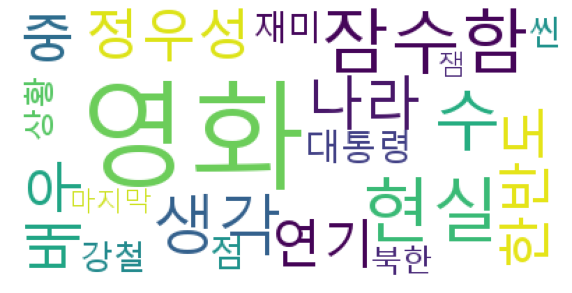

In [23]:
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(gang2_wc)

### 강철비

In [24]:
mv_nouns2 = []
for post in gang:
    for noun in tagger.nouns(post):
        if noun not in mv_stop_words:
            mv_nouns2.append(noun)

mv_nouns2[0:10]

['영화', '영화', '흥미', '진진', '강철', '비', '영환', '줄', '액션', '짱']

In [25]:
from collections import Counter
num_top_nouns2 = 20
mv_nouns_counter2 = Counter(mv_nouns2)
mv_top_nouns2 = dict(mv_nouns_counter2.most_common(num_top_nouns2))
print(mv_top_nouns2)

{'영화': 186, '정우성': 58, '연기': 52, '생각': 44, '현실': 43, '수': 38, '스토리': 37, '북한': 31, '곽도원': 26, '듯': 24, '남북': 23, '최고': 22, '말': 21, '한국': 21, '기대': 20, '만': 20, '전쟁': 20, '거': 19, '중': 19, '감동': 18}


In [26]:
gang_wc = WordCloud(background_color="white", font_path='./font/malgun.ttf') # 디폴트 블랙
gang_wc.generate_from_frequencies(mv_top_nouns2) # frequencies 빈도

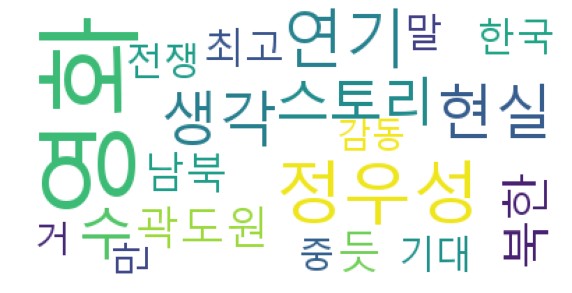

In [27]:
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(gang_wc)

### 변호인

In [35]:
mv_nouns3 = []
for post in byun:
    for noun in tagger.nouns(post):
        if noun not in mv_stop_words:
            mv_nouns3.append(noun)

mv_nouns3[0:10]

['아래', '글', '독재', '시절', '물고문', '처', '사료', '거', '놈', '시절']

In [36]:
from collections import Counter
num_top_nouns3 = 20
mv_nouns_counter3 = Counter(mv_nouns3)
mv_top_nouns3 = dict(mv_nouns_counter3.most_common(num_top_nouns3))
print(mv_top_nouns3)

{'영화': 87, '대통령': 33, '국민': 31, '사람': 28, '송강호': 26, '노무현': 22, '감동': 17, '국가': 16, '최고': 16, '연기': 16, '눈물': 15, '역사': 14, '변호인': 13, '분': 13, '시절': 12, '수': 12, '나라': 12, '시대': 11, '가슴': 11, '번': 10}


In [37]:
byun_wc = WordCloud(background_color="white", font_path='./font/malgun.ttf') # 디폴트 블랙
byun_wc.generate_from_frequencies(mv_top_nouns3) # frequencies 빈도

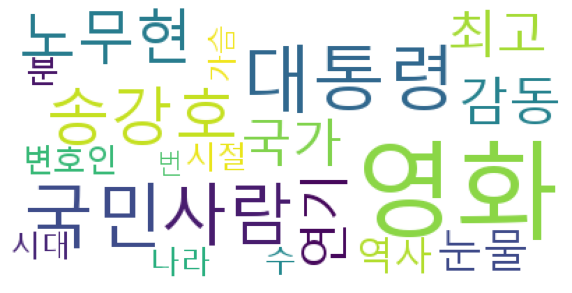

In [38]:
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(byun_wc)

## BoW (핵심어 분석, 유사도 분석)

### 강철비2

In [203]:
tokenizer = Okt()

In [204]:
mv_nouns4 = []
for post in gang2:
    for noun in tagger.nouns(post):
        if noun not in mv_stop_words:
            mv_nouns4.append(noun)

NotImplementedError: Wrong number or type of arguments for overloaded function 'Tagger_parse'.
  Possible C/C++ prototypes are:
    MeCab::Tagger::parse(MeCab::Model const &,MeCab::Lattice *)
    MeCab::Tagger::parse(MeCab::Lattice *) const
    MeCab::Tagger::parse(char const *)


In [ ]:
from collections import Counter
num_top_nouns4 = 50
mv_nouns_counter4 = Counter(mv_nouns4)
mv_top_nouns4 = dict(mv_nouns_counter4.most_common(num_top_nouns4))
print(mv_top_nouns4)

In [ ]:
# word_to_index = {}

# # 토큰을 인덱스로 변환
# for token in bow:
#     if token not in word_to_index.keys():
#         word_to_index[token] = len(word_to_index)
        
# print(word_to_index)

In [ ]:
# def convert_bow(sentence, word_to_index):
    
#     # 벡터를 단어의 개수만큼 0으로 초기화
#     vector = [0]*(len(word_to_index))

#     # 문장을 토큰으로 분리
#     tokenizer = Okt()
#     bow = tokenizer.morphs(sentence)
    
#     # 단어의 인덱스 위치에 1 설정
#     for token in bow:
#         if token in word_to_index.keys():
#             vector[word_to_index[token]] += 1
    
#     return vector

# print(word_to_index)

In [ ]:
sentence = " ".join(mv_top_nouns4)

print(sentence)

In [ ]:
sentences = []
sentences.append(sentence)

print(sentences)

In [ ]:
cv = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
cv.fit(sentences)

In [ ]:
# CountVectorizer로 변환
def convert_cv(sentence, cv):
    
    # 문장을 토큰으로 분리
    tokenizer = Okt()
    tokens = tokenizer.morphs(sentence)
    
    # 토큰을 문자열로 변환
    sentence = " ".join(tokens)
    
    # CountVectorizer의 입력에 맞게 배열로 변경
    sentences = []
    sentences.append(sentence)
    
    # 벡터 변환
    vector = cv.transform(sentences).toarray()    
    
    return vector

In [ ]:
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B)) # 각도 / 거리

In [ ]:
gang2_full = ''

for line in gang2:
    gang2_full = gang2_full+ '' + str(line)
gang2_full_line = gang2_full.split('\r\n')

In [ ]:
gang_full = ''

for line in gang:
    gang_full = gang_full+ '' + str(line)
gang_full_line = gang_full.split('\r\n')

In [ ]:
# print(cos_sim(convert_cv(gang2_full_line, cv)[0], convert_cv(gang_full_line, cv)[0]))

In [ ]:
cosine_sim = cosine_similarity(convert_cv(gang2_full_line, cv), convert_cv(gang_full_line, cv))
cosine_sim

## TF-IDF (핵심어 분석, 유사도 분석)

### 강철비2

In [39]:
from collections import Counter
num_top_nouns = 20
mv_nouns_counter = Counter(mv_nouns)
mv_top_nouns = dict(mv_nouns_counter.most_common(num_top_nouns))
print(mv_top_nouns)

{'영화': 236, '현실': 48, '잠수함': 48, '수': 44, '생각': 43, '배우': 34, '나라': 33, '정우성': 31, '한반도': 30, '연기': 28, '중': 28, '대통령': 28, '점': 27, '재미': 25, '씬': 24, '강철': 24, '상황': 22, '북한': 21, '마지막': 20, '잼': 20}


In [40]:
mv_tfidv = TfidfVectorizer(stop_words=["영화"]).fit(mv_top_nouns)
mv_tfidv.vocabulary_

{'현실': 13,
 '잠수함': 9,
 '생각': 7,
 '배우': 4,
 '나라': 1,
 '정우성': 11,
 '한반도': 12,
 '연기': 8,
 '대통령': 2,
 '재미': 10,
 '강철': 0,
 '상황': 6,
 '북한': 5,
 '마지막': 3}

In [41]:
mv_tfidv.transform(gang2).toarray()

print(pd.DataFrame(mv_tfidv.transform(gang2).toarray()))

       0    1         2    3    4    5    6    7    8    9   10   11   12  \
0    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..   ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
495  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
496  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
497  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
498  0.0  0.0  0.707107  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
499  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           13  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.0000

### 강철비

In [42]:
from collections import Counter
num_top_nouns2 = 20
mv_nouns_counter2 = Counter(mv_nouns2)
mv_top_nouns2 = dict(mv_nouns_counter2.most_common(num_top_nouns2))
print(mv_top_nouns2)

{'영화': 186, '정우성': 58, '연기': 52, '생각': 44, '현실': 43, '수': 38, '스토리': 37, '북한': 31, '곽도원': 26, '듯': 24, '남북': 23, '최고': 22, '말': 21, '한국': 21, '기대': 20, '만': 20, '전쟁': 20, '거': 19, '중': 19, '감동': 18}


In [43]:
mv_tfidv_2 = TfidfVectorizer(stop_words=["영화"]).fit(mv_top_nouns2)
mv_tfidv_2.vocabulary_

{'정우성': 9,
 '연기': 7,
 '생각': 5,
 '현실': 12,
 '스토리': 6,
 '북한': 4,
 '곽도원': 1,
 '남북': 3,
 '최고': 10,
 '한국': 11,
 '기대': 2,
 '전쟁': 8,
 '감동': 0}

In [44]:
mv_tfidv_2.transform(gang).toarray()

print(pd.DataFrame(mv_tfidv_2.transform(gang).toarray()))

       0    1    2    3    4    5    6    7    8    9   10   11   12
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
498  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[500 rows x 13 columns]


### 변호인

In [45]:
from collections import Counter
num_top_nouns3 = 20
mv_nouns_counter3 = Counter(mv_nouns3)
mv_top_nouns3 = dict(mv_nouns_counter3.most_common(num_top_nouns3))
print(mv_top_nouns3)

{'영화': 87, '대통령': 33, '국민': 31, '사람': 28, '송강호': 26, '노무현': 22, '감동': 17, '국가': 16, '최고': 16, '연기': 16, '눈물': 15, '역사': 14, '변호인': 13, '분': 13, '시절': 12, '수': 12, '나라': 12, '시대': 11, '가슴': 11, '번': 10}


In [46]:
mv_tfidv_3 = TfidfVectorizer(stop_words=["영화"]).fit(mv_top_nouns3)
mv_tfidv_3.vocabulary_

{'대통령': 7,
 '국민': 3,
 '사람': 9,
 '송강호': 10,
 '노무현': 5,
 '감동': 1,
 '국가': 2,
 '최고': 15,
 '연기': 14,
 '눈물': 6,
 '역사': 13,
 '변호인': 8,
 '시절': 12,
 '나라': 4,
 '시대': 11,
 '가슴': 0}

In [47]:
mv_tfidv_3.transform(byun).toarray()

print(pd.DataFrame(mv_tfidv_3.transform(byun).toarray()))

       0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      14   15  
0    0.0  0.0  
1    0.0  0.0  
2    0.0  0.0  
3    0.0  0

## word2vec

In [48]:
from gensim.models import Word2Vec,KeyedVectors
from pprint import pprint

In [ ]:
embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")

In [49]:
def remove_values_from_list(the_list, val):
    while val in the_list:
        the_list.remove(val)

### 강철비2

In [96]:
file_name = './강철비2.txt'
model_name = './word2vec'

In [97]:
gang2 = [sent.strip().split(" ") for sent in open(file_name, 'r', encoding="utf-8").readlines()]

In [98]:
gang2

[['"대한민국의', '현실을', '직시하고', '있는', '영화!'],
 ['잠수함', '액션', '씬은', '역대', '최고,', '유령,', '붉은', '10월', '보다도', '멋지다!"'],
 ['재밌다.', '표값이', '아깝지', '않다.', '강추다.'],
 ['""'],
 ['재미도', '있고', '울림도', '있었던', '영화', '입니다.', '실', '관람하고', '쓰는', '평이에요...'],
 ['굿'],
 ['"첫부분의',
  '패러디가',
  '재미있었는데',
  '주위',
  '사람들이',
  '웃지',
  '않아서',
  '어색했네요.',
  '한국,',
  '북한,',
  '미국의',
  '정상들이',
  '너무',
  '현실감',
  '있게',
  '느껴져서',
  '지루하지가',
  '않았어요.',
  '시원하고',
  '재미있게',
  '잘',
  '봤습니다.',
  '어서',
  '전쟁',
  '상황이',
  '끝나고',
  '평화로운',
  '세상이',
  '되었으면',
  '합니다.',
  '배우들',
  '모두',
  '멋져요"'],
 ['그냥', '씨레깅', '정치영화'],
 ['재미있게', '잘', '보고', '왔습니다', '^^'],
 ['재미있게', '잘', '보고', '왔습니다.'],
 ['"장점:', '정우성', '얼굴', '멋짐'],
 ['단점:', '스토리,', '연출,', '국뽕', '등등......'],
 ['중하', '수준의', '한국영화임.'],
 ['오늘부터', '우리는', '중국국뽕', '비웃으면안됨."'],
 ['재미있게', '잘', '보고', '왔습니다.'],
 ['"신선,', '재미,', '감동!', '보람찬', '두시간."'],
 ['"크게',
  '생각않고',
  '봤는데',
  '너무',
  '재밌어서',
  '놀랐어요,',
  '스토리도',
  '좋고',
  '보는내내',
  '긴장감',
  '넘치고',
  '해서',
  '화장실도',
  '참으면서',
  '봤음~^^',
  

In [99]:
remove_values_from_list(gang2, ["''"])
remove_values_from_list(gang2, ['""'])
remove_values_from_list(gang2, ['.'])

In [100]:
gang2

[['"대한민국의', '현실을', '직시하고', '있는', '영화!'],
 ['잠수함', '액션', '씬은', '역대', '최고,', '유령,', '붉은', '10월', '보다도', '멋지다!"'],
 ['재밌다.', '표값이', '아깝지', '않다.', '강추다.'],
 ['재미도', '있고', '울림도', '있었던', '영화', '입니다.', '실', '관람하고', '쓰는', '평이에요...'],
 ['굿'],
 ['"첫부분의',
  '패러디가',
  '재미있었는데',
  '주위',
  '사람들이',
  '웃지',
  '않아서',
  '어색했네요.',
  '한국,',
  '북한,',
  '미국의',
  '정상들이',
  '너무',
  '현실감',
  '있게',
  '느껴져서',
  '지루하지가',
  '않았어요.',
  '시원하고',
  '재미있게',
  '잘',
  '봤습니다.',
  '어서',
  '전쟁',
  '상황이',
  '끝나고',
  '평화로운',
  '세상이',
  '되었으면',
  '합니다.',
  '배우들',
  '모두',
  '멋져요"'],
 ['그냥', '씨레깅', '정치영화'],
 ['재미있게', '잘', '보고', '왔습니다', '^^'],
 ['재미있게', '잘', '보고', '왔습니다.'],
 ['"장점:', '정우성', '얼굴', '멋짐'],
 ['단점:', '스토리,', '연출,', '국뽕', '등등......'],
 ['중하', '수준의', '한국영화임.'],
 ['오늘부터', '우리는', '중국국뽕', '비웃으면안됨."'],
 ['재미있게', '잘', '보고', '왔습니다.'],
 ['"신선,', '재미,', '감동!', '보람찬', '두시간."'],
 ['"크게',
  '생각않고',
  '봤는데',
  '너무',
  '재밌어서',
  '놀랐어요,',
  '스토리도',
  '좋고',
  '보는내내',
  '긴장감',
  '넘치고',
  '해서',
  '화장실도',
  '참으면서',
  '봤음~^^',
  '마지막',
  

In [101]:
model = Word2Vec(gang2, size=50, workers=4, sg=1)
model.save(model_name)

In [102]:
model1 = Word2Vec.load('word2vec')

In [103]:
model1.wv.vocab

{'현실을': <gensim.models.keyedvectors.Vocab at 0x226e5d65188>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x226e5d65d88>,
 '잠수함': <gensim.models.keyedvectors.Vocab at 0x226e5d65548>,
 '있고': <gensim.models.keyedvectors.Vocab at 0x226e5d65208>,
 '영화': <gensim.models.keyedvectors.Vocab at 0x226e5d65248>,
 '굿': <gensim.models.keyedvectors.Vocab at 0x226e5d65908>,
 '너무': <gensim.models.keyedvectors.Vocab at 0x226e5d65c88>,
 '재미있게': <gensim.models.keyedvectors.Vocab at 0x226e5d10048>,
 '잘': <gensim.models.keyedvectors.Vocab at 0x226e5d10148>,
 '봤습니다.': <gensim.models.keyedvectors.Vocab at 0x226e5d10f48>,
 '그냥': <gensim.models.keyedvectors.Vocab at 0x226e5d5d608>,
 '보고': <gensim.models.keyedvectors.Vocab at 0x226e5d5d0c8>,
 '정우성': <gensim.models.keyedvectors.Vocab at 0x226e5d5d208>,
 '봤는데': <gensim.models.keyedvectors.Vocab at 0x226e5d5df48>,
 '긴장감': <gensim.models.keyedvectors.Vocab at 0x226e5d5dd48>,
 '마지막': <gensim.models.keyedvectors.Vocab at 0x226e5d5d548>,
 '그': <gensim.models.keyedvecto

In [104]:
pprint(model1.wv.most_similar(positive=["정우성", "대통령"]))

[('다른', 0.41943779587745667),
 ('우리나라', 0.3116871118545532),
 ('배우들의', 0.30766043066978455),
 ('같이', 0.3066083490848541),
 ('한반도의', 0.2531900703907013),
 ('절대', 0.24608036875724792),
 ('꼭', 0.24379444122314453),
 ('지금', 0.22806806862354279),
 ('장면', 0.21949535608291626),
 ('봤어요.', 0.19397470355033875)]


In [105]:
pprint(model1.wv.most_similar("정우성", topn=5))

[('절대', 0.32513880729675293),
 ('진짜', 0.30566132068634033),
 ('평점', 0.2568303346633911),
 ('같이', 0.2228814959526062),
 ('북한', 0.2200412005186081)]


In [164]:
model1.wv.most_similar(negative=['잠수함'])

[('가장', 0.25661394000053406),
 ('둘러싼', 0.25445079803466797),
 ('만든', 0.25174227356910706),
 ('대해', 0.24452412128448486),
 ('평점', 0.23969979584217072),
 ('잠수함씬', 0.23532472550868988),
 ('봤어요.', 0.197848379611969),
 ('다시', 0.19091098010540009),
 ('정세를', 0.1760910153388977),
 ('꼭', 0.17058613896369934)]

### 강철비

In [115]:
file_name = './강철비.txt'
model_name = './word2vec2'

In [116]:
gang = [sent.strip().split(" ") for sent in open(file_name, 'r', encoding="utf-8").readlines()]

In [117]:
gang

[['""'],
 ['""'],
 ['"영화', '아주', '좋았음~'],
 ['꼭', '봐야할', '', '영화~"'],
 ['흥미진진~!!'],
 ['강철비가', '이렇게', '재밌는', '영환줄', '몰랐네.'],
 ['"액션짱', '긴장감짱'],
 ['정우성이', '진지하게', '웃기는게', '킬포ㅋ'],
 ['지동무는', '밥은', '먹고', '다니나?ㅋ"'],
 ['잼난다!!!'],
 ['"너무',
  '잼나고',
  '',
  '가슴',
  '벅차고',
  '',
  '',
  '감동적입니다',
  '끝부분에서',
  '박수칠뻔',
  '가슴이',
  '뭉클......다시',
  '보고싶어요^"""'],
 ['진짜',
  '재밌게',
  '봤어요',
  '기대',
  '안하고',
  '봤는데',
  '몰입감',
  '쩜!!!',
  '정우성',
  '연기',
  '점점',
  '는다능~~~^^',
  '뚱땡이',
  '진짜',
  '살좀빼라',
  '아오'],
 ['""'],
 ['강철비2',
  '잼나게',
  '보고',
  '들렀습니다.',
  '참고로',
  '강철비2는',
  '1과는',
  '스토리나',
  '등장',
  '인물',
  '연관은',
  '없습니다.',
  '1보다',
  '스케일이',
  '커지고',
  '잠수함',
  '전투씬이',
  '짜릿합니다.',
  '매우',
  '재밌습니다.'],
 ['"강철비2를', '기대하며', '다시봐도', '가슴저립니다.'],
 ['우리의',
  '소원이',
  '통일이전에',
  '우리는',
  '서로',
  '이해하고',
  '아픔을',
  '안고있는',
  '노년의',
  '부모님들의',
  '설움을',
  '안아야',
  '하지',
  '않을까요."'],
 ['""'],
 ['"넷플로', '이제서야', '만남.'],
 ['심장이', '두근두근', '너무', '멋진', '영화.'],
 ['연출.', '시나리오.', '배우들의', '연기', '모두', '너무', '훌륭한', '영화."

In [118]:
remove_values_from_list(gang, ["''"])
remove_values_from_list(gang, ['""'])
remove_values_from_list(gang, ['.'])

In [119]:
model = Word2Vec(gang, size=30, workers=4, sg=0)
model.save(model_name)

In [120]:
model2 = Word2Vec.load('word2vec2')

In [121]:
model2.wv.vocab

{'아주': <gensim.models.keyedvectors.Vocab at 0x226e5bebac8>,
 '': <gensim.models.keyedvectors.Vocab at 0x226e5bebb48>,
 '이렇게': <gensim.models.keyedvectors.Vocab at 0x226e5beb108>,
 '정우성이': <gensim.models.keyedvectors.Vocab at 0x226e5d46908>,
 '진짜': <gensim.models.keyedvectors.Vocab at 0x226e5d46188>,
 '재밌게': <gensim.models.keyedvectors.Vocab at 0x226e5d65788>,
 '봤는데': <gensim.models.keyedvectors.Vocab at 0x226e5d658c8>,
 '정우성': <gensim.models.keyedvectors.Vocab at 0x226e5d65cc8>,
 '연기': <gensim.models.keyedvectors.Vocab at 0x226e5d651c8>,
 '보고': <gensim.models.keyedvectors.Vocab at 0x226e5c06c08>,
 '매우': <gensim.models.keyedvectors.Vocab at 0x226e5c06b48>,
 '너무': <gensim.models.keyedvectors.Vocab at 0x226e5c06d88>,
 '영화.': <gensim.models.keyedvectors.Vocab at 0x226e5c06b88>,
 '배우들의': <gensim.models.keyedvectors.Vocab at 0x226e5c06c48>,
 'ㅋㅋ': <gensim.models.keyedvectors.Vocab at 0x226e5c06688>,
 '정말': <gensim.models.keyedvectors.Vocab at 0x226e5c06088>,
 '수': <gensim.models.keyedvectors

In [162]:
pprint(model2.wv.most_similar(positive=["곽도원", "정우성"], negative=["연기"]))

[('북한', 0.292147159576416),
 ('많은', 0.2757182717323303),
 ('이런', 0.24398046731948853),
 ('배우들의', 0.22548028826713562),
 ('영화는', 0.22144177556037903),
 ('연기도', 0.19993509352207184),
 ('만든', 0.1860811859369278),
 ('최고', 0.18373078107833862),
 ('정우성이', 0.16511410474777222),
 ('스토리', 0.1560353934764862)]


In [123]:
pprint(model2.wv.most_similar("북한", topn=5))

[('이렇게', 0.458534300327301),
 ('너무', 0.4469207227230072),
 ('좀', 0.36167359352111816),
 ('수', 0.35486286878585815),
 ('영화', 0.30067652463912964)]


In [161]:
model2.wv.most_similar(negative=['감동'])

[('영화.', 0.3794320821762085),
 ('감독의', 0.3749481737613678),
 ('대한', 0.32894831895828247),
 ('없다.', 0.30807554721832275),
 ('특히', 0.294841468334198),
 ('그리고', 0.24268734455108643),
 ('이제', 0.23815034329891205),
 ('정우성의', 0.23438149690628052),
 ('한', 0.22958435118198395),
 ('연기도', 0.22007116675376892)]

### 변호인

In [129]:
file_name = './변호인.txt'
model_name = './word2vec3'

In [130]:
byun = [sent.strip().split(" ") for sent in open(file_name, 'r', encoding="utf-8").readlines()]

In [131]:
byun

[['""'],
 ['"아래',
  '글에',
  '독재',
  '시절',
  '때',
  '물고문',
  '처',
  '당하다가',
  '뒤지거나',
  '사료기에',
  '갈려',
  '죽거나',
  '하는거',
  '좋아하는',
  '놈들',
  '많네.'],
 ['그', '시절이라면', '일베,', '태극기부대들이', '살아있었을까?"'],
 ['노무현이의',
  '성장통영화.그를',
  '싫어하지만',
  '싸워야하는',
  '시대였다.반골이고',
  '어차피',
  '비주류.노무현',
  '그의',
  '변호사시절에게',
  '박수친다'],
 ['그립다..고마운', '영화'],
 ['ㅡㅡ'],
 ['송강호',
  '이성민',
  '오달수',
  '곽도원',
  '정원중',
  '임시완',
  '배우님',
  '그리고',
  '이젠',
  '하늘의',
  '별이',
  '되신',
  '고',
  '김영애',
  '배우님까지',
  '라인업만',
  '봐도',
  '후덜덜한데',
  '아픈',
  '역사와',
  '재판까지',
  '어느',
  '장면을',
  '보더라도',
  '고증도',
  '잘되어',
  '있고',
  '스토리라인도',
  '기승전결이',
  '완벽해서',
  '정말',
  '인생',
  '영화라',
  '칭해도',
  '될',
  '영화',
  '내가',
  '만약',
  '죽기',
  '전에',
  '한',
  '편의',
  '영화를',
  '볼',
  '수',
  '있다면',
  '단언컨데',
  '변호인을',
  '볼',
  '것이다'],
 ['더러운세상에', '묻어가지말자', '소신을지키자'],
 ['"몇번을', '봐도', '눈물이', '흐릅니다'],
 ['노대통령님,', '', '당신의', '길지', '', '않은', '삶은'],
 ['이회영', '', '독립운동가가', '20대에', '하셨던', '말씀'],
 ['ㅡ한', '번', '뿐인', '삶을', '어떻게', '살아야할까ㅡ'],
 ['에', '답을', '주신', '

In [132]:
remove_values_from_list(byun, ["''"])
remove_values_from_list(byun, ['""'])
remove_values_from_list(byun, ['.'])

In [133]:
model = Word2Vec(byun, size=50, workers=4, sg=1, hs=1)
model.save(model_name)

In [134]:
model3 = Word2Vec.load('word2vec3')

In [135]:
model3.wv.vocab

{'그': <gensim.models.keyedvectors.Vocab at 0x226e59fde88>,
 '영화': <gensim.models.keyedvectors.Vocab at 0x226e59fdfc8>,
 '송강호': <gensim.models.keyedvectors.Vocab at 0x226dd5fae48>,
 '그리고': <gensim.models.keyedvectors.Vocab at 0x226e5f77d48>,
 '봐도': <gensim.models.keyedvectors.Vocab at 0x226e5f77908>,
 '정말': <gensim.models.keyedvectors.Vocab at 0x226e5f77cc8>,
 '한': <gensim.models.keyedvectors.Vocab at 0x226e5f77d08>,
 '영화를': <gensim.models.keyedvectors.Vocab at 0x226e5f77e08>,
 '수': <gensim.models.keyedvectors.Vocab at 0x226e5f77248>,
 '눈물이': <gensim.models.keyedvectors.Vocab at 0x226e5f77dc8>,
 '': <gensim.models.keyedvectors.Vocab at 0x226e57fafc8>,
 '없는': <gensim.models.keyedvectors.Vocab at 0x226e5f69788>,
 '이': <gensim.models.keyedvectors.Vocab at 0x226e5f693c8>,
 '다시': <gensim.models.keyedvectors.Vocab at 0x226e5f69248>,
 '사람이': <gensim.models.keyedvectors.Vocab at 0x226e5f61dc8>,
 '더': <gensim.models.keyedvectors.Vocab at 0x226e5f61948>,
 '국민을': <gensim.models.keyedvectors.Vocab 

In [136]:
pprint(model3.wv.most_similar(positive=["송강호", "그냥"]))

[('영화', 0.4111625850200653),
 ('더', 0.26249799132347107),
 ('아직도', 0.2238936722278595),
 ('수', 0.22369959950447083),
 ('그', 0.20546972751617432),
 ('위해', 0.16045817732810974),
 ('너무', 0.13472415506839752),
 ('노무현', 0.12284675240516663),
 ('사람을', 0.121360182762146),
 ('다시', 0.11243384331464767)]


In [137]:
pprint(model3.wv.most_similar("송강호", topn=5))

[('영화', 0.3524155616760254),
 ('위해', 0.3374999761581421),
 ('그', 0.32288846373558044),
 ('할', 0.19559189677238464),
 ('너무', 0.1829489916563034)]


In [159]:
model3.wv.most_similar(negative=['우리'])

[('', 0.24069826304912567),
 ('노무현', 0.18597093224525452),
 ('그냥', 0.16083590686321259),
 ('더', 0.14996588230133057),
 ('정말', 0.14457742869853973),
 ('너무', 0.1419881135225296),
 ('봤습니다.', 0.13523811101913452),
 ('시대를', 0.11780492961406708),
 ('국민을', 0.09516937285661697),
 ('아직도', 0.08644451946020126)]

## 감정분석

#### 평점 크롤링

In [184]:
review_list_num= []

for i in range(10):
    url = urls.format(i+1)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    lists = soup.findAll('em', {'class' : 'emph_grade'})
#     print(lists)
    for review in lists:
        review_list_num.append(review.get_text().strip())

In [185]:
강철비2_Y = 강철비2[:100]
강철비2_Y["label"] = review_list_num

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [186]:
강철비2_Y

,0,label
0,"대한민국의 현실을 직시하고 있는 영화!\r 잠수함 액션 씬은 역대 최고, 유령, 붉...",9
1,재밌다. 표값이 아깝지 않다. 강추다.,10
2,,9
3,재미도 있고 울림도 있었던 영화 입니다. 실 관람하고 쓰는 평이에요...,9
4,굿,10
...,...,...
95,강철비 짱!!!,10
96,혹시나 했는데 문정권의 북한미화는 정말 소름끼친다.!!!무조건 덮어놓고 반미 반일이...,10
97,대박...,1
98,A++,10


### 강철비2

### 강철비

### 변호인